### Train a Wasserstein GAN on the Training Dataset

Specify the type of the training dataset.

In [1]:
experiment_ids = ["test_1", "test_2", "test_3"]
data_names = ["complex1", "complex2", "Box2", "Box3", "SigBox1"]
result_dir_names = ["TestCpx100K_2D", "TestSigma_2D", "TestBOX100K_2D"]

experiment_id = experiment_ids[1]  #"test_2"
data_name = data_names[2] #"Box2"
result_dir_name = result_dir_names[2] #"TestBOX100K_2D"


Train the Wasserstein GAN.

In [4]:
!python train_gan.py -i ./data/training_dataset_{experiment_id}_{data_name}_{result_dir_name}.mat -o ./output_{experiment_id}_{data_name}_{result_dir_name}


Reading Data...
/home/ubuntu/.local/lib/python3.8/site-packages/scipy/io/matlab/_mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)
currently using device: cuda:0
[0/200][0/2]	Loss_D: 0.2367	Loss_G: -0.0447	 Wasserstein Distance: 0.2178	  Elapsed time per Iteration: 1.1325s
average difference: 0.4280/pixel, std difference: 0.1442/pixel,                     EMD distance: 0.4782/pixel
[1/200][0/2]	Loss_D: -8.2950	Loss_G: -1.1672	 Wasserstein Distance: 8.5068	  Elapsed time per Iteration: 0.0137s
[2/200][0/2]	Loss_D: -20.8987	Loss_G: -4.0078	 Wasserstein Distance: 21.0043	  Elapsed time per Iteration: 0.0137s
[3/200][0/2]	Loss_D: -34.8007	Loss_G: -10.1358	 Wasserstein Distance: 36.8337	  Elapsed time per Iteration: 0.0139s
[4/200][0/2]	Loss_D: -43.2816	Loss_G: -21.0185	 Wasserstein Distance: 50.7182	  Elapsed time per Ite

### Evaluate the Trained Wasserstein GAN

In [5]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pickle

from process_data import ToyDataset, MinMaxScaler
from generative_model import WGAN_SIMPLE

import matplotlib.pyplot as plt

Load the saved model file

In [6]:
checkpoint_dir = "./output_"+experiment_id+"_"+data_name+"_"+result_dir_name+"/model/"
checkpoint_name = "model_final.pth"

checkpoint = torch.load(checkpoint_dir + checkpoint_name)
model = WGAN_SIMPLE(ndim=checkpoint["ndim"])
model.load(checkpoint)

Generate samples from the trained Wasserstein GAN

In [8]:
num_samples = 10000
generated_samples = model.generate(num_samples)
generated_samples = np.reshape(generated_samples, (generated_samples.shape[0], 101, 101))


Compute the mean of the samples generated by the GAN.

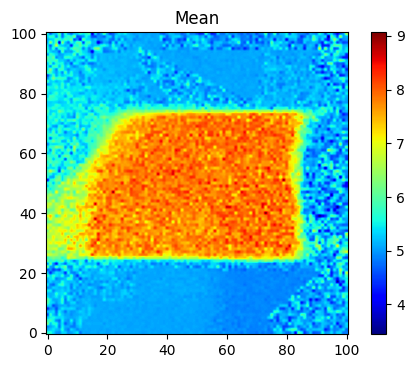

In [9]:
mean_generated_samples = np.mean(generated_samples, 0)

plt.figure(dpi=100)
plt.imshow(mean_generated_samples, origin='lower', cmap="jet")
plt.title("Mean")
plt.colorbar()
plt.show()




Compute the standard deviation of the samples generated by the GAN.

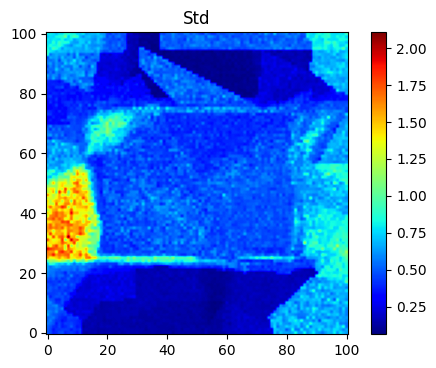

In [10]:
std_generated_samples = np.std(generated_samples, 0)


plt.figure(dpi=100)
plt.imshow(std_generated_samples, origin='lower', cmap="jet")
plt.title("Std")
plt.colorbar()
plt.show()